# Unlocking Longevity: A Global Journey Through Life Expectancy

## 1) Import libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from functools import reduce

## 2) Load data

In [ ]:
life_expectancy2_file_path = r"/content/drive/MyDrive/SC4024/data/life expectancy data/life-expectancy.csv"
life_expectancy2_data = pd.read_csv(life_expectancy2_file_path)
print(f"Number of countries: {len(life_expectancy2_data['Entity'].value_counts())}")
life_expectancy2_data = life_expectancy2_data[life_expectancy2_data['Year']>=1950]
life_expectancy2_data

Number of countries: 261


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258
...,...,...,...,...
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242


In [ ]:
life_expectancy_gdp_file_path = r"/content/drive/MyDrive/SC4024/data/life expectancy data/life-expectancy-vs-gdp-per-capita.csv"
life_expectancy_gdp_data = pd.read_csv(life_expectancy_gdp_file_path)
print(f"Number of countries: {len(life_expectancy_gdp_data['Entity'].value_counts())}")
life_expectancy_gdp_data = life_expectancy_gdp_data[(life_expectancy_gdp_data['Year']>=1950) & (life_expectancy_gdp_data['Year']<=2021)]
life_expectancy_gdp_data

Number of countries: 331


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,GDP per capita,900793-annotations,Population (historical),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
188,Afghanistan,AFG,1950,27.7275,1156.0000,NaN,7776182.0,NaN
189,Afghanistan,AFG,1951,27.9634,1170.0000,NaN,7879343.0,NaN
190,Afghanistan,AFG,1952,28.4456,1189.0000,NaN,7987783.0,NaN
191,Afghanistan,AFG,1953,28.9304,1240.0000,NaN,8096703.0,NaN
...,...,...,...,...,...,...,...,...
64634,Zimbabwe,ZWE,2017,60.7095,1843.9463,NaN,14812484.0,NaN
64635,Zimbabwe,ZWE,2018,61.4141,1900.1992,NaN,15034457.0,NaN
64636,Zimbabwe,ZWE,2019,61.2925,1753.0244,NaN,15271377.0,NaN
64637,Zimbabwe,ZWE,2020,61.1242,1585.9728,NaN,15526888.0,NaN


In [ ]:
country_continent_file_path = r"/content/drive/MyDrive/SC4024/data/life expectancy data/country-continent.xlsx"
country_continent_data = pd.read_excel(country_continent_file_path)
country_continent_data

,Entity,Continent,Status
0,Afghanistan,Asia,Least Developed
1,Albania,Europe,Developing
2,Algeria,Africa,Developing
3,American Samoa,Oceania,Least Developed
4,Andorra,Europe,Developed
...,...,...,...
231,Wallis and Futuna,Oceania,Developing
232,Western Sahara,Africa,Developing
233,Yemen,Asia,Least Developed
234,Zambia,Africa,Least Developed


In [ ]:
life_expectancy_male_female_file_path = r"/content/drive/MyDrive/SC4024/data/life expectancy data/life-expectancy-of-women-vs-life-expectancy-of-men.csv"
life_expectancy_male_female_data = pd.read_csv(life_expectancy_male_female_file_path)
life_expectancy_male_female_data = life_expectancy_male_female_data[['Entity', 'Year', 'Life expectancy - Sex: female - Age: 0 - Variant: estimates', 'Life expectancy - Sex: male - Age: 0 - Variant: estimates', 'Population - Sex: all - Age: all - Variant: estimates', 'Continent']]
life_expectancy_male_female_data.columns = ['Country', 'Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population', 'Continent']
life_expectancy_male_female_data

,Country,Year,Female Life Expectancy,Male Life Expectancy,Population,Continent
0,Abkhazia,2015,NaN,NaN,NaN,Asia
1,Afghanistan,1950,28.834,27.547,7776182.0,NaN
2,Afghanistan,1951,29.275,27.971,7879343.0,NaN
3,Afghanistan,1952,29.714,28.394,7987783.0,NaN
4,Afghanistan,1953,30.164,28.822,8096703.0,NaN
...,...,...,...,...,...,...
18987,Zimbabwe,2019,63.049,58.830,15271377.0,NaN
18988,Zimbabwe,2020,63.747,59.091,15526888.0,NaN
18989,Zimbabwe,2021,62.289,57.717,15797220.0,NaN
18990,Zimbabwe,2022,64.544,59.880,16069061.0,NaN


## Chapter 1: Mapping Global Trends in Life Expectancy


### Chart 1: Line chart showing global life expectancy average



In [ ]:
region_list = ['Europe', 'Asia', 'World', 'Americas', 'Africa', 'Oceania']
data_chp1_pivot = life_expectancy2_data.pivot(index='Entity', columns='Year', values='Period life expectancy at birth - Sex: all - Age: 0')
filtered_data = data_chp1_pivot[data_chp1_pivot.index.isin(region_list)]
filtered_data

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Entity,,,,,,,,,,,,,,,,,,,,,
Africa,37.623500,37.930900,38.443000,38.915200,39.299100,39.800800,40.170400,40.012900,40.303000,41.282300,...,59.81060,60.29240,60.74630,61.128800,61.58800,61.98580,62.34350,62.68800,62.234200,61.660900
Americas,58.116535,58.380806,58.803745,59.247337,59.963135,60.246532,60.603485,60.745056,61.212376,61.558346,...,75.98362,76.15026,76.30933,76.299194,76.26651,76.35949,76.48758,76.66325,74.835236,74.189156
Asia,42.024000,42.995600,44.268200,44.877400,45.766200,46.330800,46.838600,47.333200,47.844500,44.311300,...,72.04160,72.39010,72.78410,73.120500,73.44460,73.68100,73.99090,74.18760,73.741500,72.532100
Europe,62.833900,62.813900,64.047400,64.676600,65.456100,66.048300,66.940400,66.946300,68.196700,68.144200,...,77.25300,77.58110,77.92230,77.991600,78.42720,78.66250,78.78790,79.12210,77.740100,77.033600
Oceania,61.376500,60.625700,62.000700,62.681200,63.010100,63.439000,63.568000,63.985700,64.617500,64.536200,...,77.69020,77.95740,77.98420,78.162400,78.35370,78.54320,78.82710,78.74850,79.495800,79.444400
World,46.464300,47.144000,48.231100,48.802400,49.591900,50.122900,50.642500,50.944800,51.537000,49.345300,...,70.87250,71.20720,71.56490,71.800400,72.11020,72.32670,72.57590,72.78970,72.036100,71.047900


In [ ]:
filtered_data.to_csv(r'/content/drive/MyDrive/SC4024/data/life expectancy data/data exports/line_chart.csv')

In [ ]:
# Reset the index so 'Entity' becomes a regular column
df = filtered_data.reset_index()

# Melt the dataframe to have a suitable format for Plotly (long format)
df_melted = df.melt(id_vars='Entity', var_name='Year', value_name='Life Expectancy')

# Filter out non-numeric years before conversion
# Fill missing values in 'Year' with an empty string and filter out non-numeric years before conversion
df_melted['Year'] = df_melted['Year'].fillna('').astype(str)
df_melted = df_melted[df_melted['Year'].str.isnumeric()]
df_melted['Year'] = df_melted['Year'].astype(int)

# Custom colors for each region, lighter for non-"World" lines
custom_colors = {
    'Africa': 'rgba(55,126,184, 0.6)',
    'Americas': 'rgba(77,175,74, 0.6)',
    'Asia': 'rgba(152,78,163, 0.6)',
    'Europe': 'rgba(255,127,0, 0.6)',
    'Oceania': 'rgba(166,86,40, 0.6)',
    'World': 'red'
}

# Create a Plotly figure
fig = go.Figure()

# Add a line for each entity
for entity in df_melted['Entity'].unique():
    fig.add_trace(go.Scatter(
        x=df_melted[df_melted['Entity'] == entity]['Year'],
        y=df_melted[df_melted['Entity'] == entity]['Life Expectancy'],
        mode='lines',
        name=entity,
        line=dict(color=custom_colors.get(entity, 'gray'), width=4 if entity == 'World' else 2),
        hoverinfo='x+y+name',  # Show year, life expectancy, and name on hover
        opacity=1
    ))

# Add custom annotations for inline labels at the end of each line
for entity in df_melted['Entity'].unique():
    # Get the last year and life expectancy value for each entity
    last_year = df_melted[df_melted['Entity'] == entity]['Year'].max()
    last_value = df_melted[(df_melted['Entity'] == entity) & (df_melted['Year'] == last_year)]['Life Expectancy'].values[0]

    fig.add_annotation(
        x=last_year,
        y=last_value,
        text=entity,
        showarrow=False,
        xanchor='left',
        font=dict(size=10, color=custom_colors.get(entity, 'gray'))
    )

# Update layout for interactivity and appearance
fig.update_layout(
    title='Life Expectancy Over Years',
    xaxis_title='Year',
    yaxis_title='Life Expectancy',
    template='plotly_white',
    hovermode='x unified',  # Ensure smooth hovering over lines
    showlegend=False  # Hide the legend to focus on inline labels
)

# Adjust opacity on hover to focus on the selected line
for trace in fig.data:
    trace.on_hover = lambda *args: [t.update(opacity=0.2) for t in fig.data if t != trace]
    trace.on_unhover = lambda *args: [t.update(opacity=1) for t in fig.data]

# Show the plot
fig.show()

<ipython-input-11-f93dac6f29da>:9: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



### Chart 2: Choropeth map showcasing country wise life expectancy

In [ ]:
choropeth_data = life_expectancy2_data[['Entity', 'Year', 'Period life expectancy at birth - Sex: all - Age: 0']]
choropeth_data = choropeth_data[choropeth_data['Year']==2021]
choropeth_data = choropeth_data[['Entity', 'Period life expectancy at birth - Sex: all - Age: 0']]
choropeth_data.columns = ['Country', 'Life Expectancy']
choropeth_data

,Country,Life Expectancy
71,Afghanistan,61.9824
145,Africa,61.6609
217,Albania,76.4626
292,Algeria,76.3767
364,American Samoa,72.5398
...,...,...
20459,Western Sahara,70.7804
20538,World,71.0479
20610,Yemen,63.7534
20682,Zambia,61.2234


In [ ]:
fig = px.choropleth(
    data_frame=choropeth_data,
    locations='Country',
    locationmode='country names',
    color='Life Expectancy',
    color_continuous_scale='Viridis',
    title='Global Life Expectancy at Birth'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(title="Life Expectancy")
)

fig.show()

### Chart 3: Racing bar chart that shows life expectancy over time across different countries over the years

In [ ]:
data_chp1 = life_expectancy2_data[['Entity', 'Year', 'Period life expectancy at birth - Sex: all - Age: 0']]
data_chp1

,Entity,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,1950,27.7275
1,Afghanistan,1951,27.9634
2,Afghanistan,1952,28.4456
3,Afghanistan,1953,28.9304
4,Afghanistan,1954,29.2258
...,...,...,...
20750,Zimbabwe,2017,60.7095
20751,Zimbabwe,2018,61.4141
20752,Zimbabwe,2019,61.2925
20753,Zimbabwe,2020,61.1242


In [ ]:
#data_chp1_pivot = data_chp1.pivot(index='Year', columns='Country', values='Life expectancy ')
data_chp1_pivot = data_chp1.pivot(index='Entity', columns='Year', values='Period life expectancy at birth - Sex: all - Age: 0')
mappings_df = pd.read_excel('/content/drive/MyDrive/SC4024/data/life expectancy data/country-continent.xlsx', sheet_name='Sheet1')
data_chp1 = pd.merge(data_chp1_pivot, mappings_df, on='Entity', how='left')
data_chp1 = data_chp1.dropna()
data_chp1

,Entity,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,Continent,Status
0,Afghanistan,27.7275,27.9634,28.4456,28.9304,29.2258,29.9206,30.4078,30.9458,31.5066,...,62.5451,62.6587,63.1361,63.0160,63.0810,63.5645,62.5751,61.9824,Asia,Least Developed
2,Albania,44.7355,45.1396,45.9788,46.5442,47.5946,48.5424,49.5758,50.7065,51.9755,...,78.4075,78.6441,78.8602,79.0473,79.1838,79.2825,76.9893,76.4626,Europe,Developing
3,Algeria,42.3596,42.4534,42.8974,42.9286,40.2048,40.3875,40.3448,40.3642,40.4426,...,75.1100,75.6220,75.7318,75.7428,76.0656,76.4742,74.4528,76.3767,Africa,Developing
4,American Samoa,60.9554,61.3618,61.6466,61.2695,62.1300,62.2637,62.6438,62.8682,63.3267,...,72.3403,72.5220,72.3712,72.4830,72.4915,72.3023,72.4432,72.5398,Oceania,Least Developed
6,Andorra,64.5863,64.2338,67.4204,68.2467,69.4804,69.2563,69.3102,69.1260,71.3539,...,82.9483,82.9534,82.9671,82.9803,82.9923,83.0039,79.0234,80.3684,Europe,Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Wallis and Futuna,43.7299,43.8997,44.2492,44.6055,44.9721,45.3232,45.6895,46.0694,46.4576,...,77.6413,77.9802,78.3347,77.5307,77.8613,79.6167,78.7639,78.4396,Oceania,Developing
252,Western Sahara,34.8811,35.0759,35.4698,35.8594,36.2534,36.6489,37.0481,37.4417,37.8298,...,68.9796,69.2957,69.5923,69.8544,70.0924,70.3129,70.5218,70.7804,Africa,Developing
254,Yemen,31.6624,31.6802,31.8022,31.9307,32.0423,32.1716,32.2743,32.3633,32.7898,...,67.3842,65.8734,66.0641,65.9573,64.5751,65.0917,64.6501,63.7534,Asia,Least Developed
255,Zambia,45.1225,45.2783,45.6798,46.1441,46.5333,46.9534,47.3717,47.7504,48.2260,...,60.6990,61.2078,61.7937,62.1201,62.3422,62.7926,62.3803,61.2234,Africa,Least Developed


In [ ]:
data_chp1.to_csv(r'/content/drive/MyDrive/SC4024/data/life expectancy data/data exports/race_chart_df3.csv')

For the vizualization see: https://app.flourish.studio/projects

### Chart 4: Difference between male and female life expectancy
- Split violin plot with slider bar component

In [ ]:
# Create the initial plot for the first year
initial_year = 1950
filtered_data = life_expectancy_male_female_data[life_expectancy_male_female_data['Year'] == initial_year]

# Initialize figure
fig = go.Figure()

# Female life expectancy for the initial year
fig.add_trace(go.Violin(
    y=filtered_data['Female Life Expectancy'],
    side='negative',
    line_color='blue',
    fillcolor='rgba(0, 0, 255, 0.5)',
    width=1.2,  # Increase width for overlap
    name='Female Life Expectancy',
    points=False
))

# Male life expectancy for the initial year
fig.add_trace(go.Violin(
    y=filtered_data['Male Life Expectancy'],
    side='positive',
    line_color='red',
    fillcolor='rgba(255, 0, 0, 0.5)',
    width=1.2,
    name='Male Life Expectancy',
    points=False
))

# Update layout with reduced width
fig.update_layout(
    title="Life Expectancy Distribution by Gender",
    yaxis_title="Life Expectancy",
    violingap=0,
    violingroupgap=0,
    violinmode='overlay',
    sliders=sliders,
    width=600,
    height=400,
    xaxis_range=[-4, 4]
)

# Show the plot
fig.show()

## Chapter 2: Health-Related Factors and Their Impact on Longevity

The Role of Healthcare Spending and Preventive Measures
Display visualizations that explore the relationship between Life Expectancy and healthcare-related variables like percentage expenditure, Total expenditure, and vaccination rates for diseases (e.g., Hepatitis B, Polio, and Diphtheria).

### Chart 5: Scatter plots to show correlations between life expectancy and health indicators like Vaccination rate, Obseity, Diet constitution,and health care access
Identify health risks that are most strongly associated with lower life expectancy.

In [ ]:
healthcare_access_data = pd.read_csv(r"/content/drive/MyDrive/SC4024/data/life expectancy data/universal-health-coverage-index.csv")
obesity_data = pd.read_csv(r"/content/drive/MyDrive/SC4024/data/life expectancy data/share-of-adults-who-are-overweight.csv")
vaccine_data = pd.read_csv(r"/content/drive/MyDrive/SC4024/data/life expectancy data/global-vaccination-coverage.csv")
fruit_consumption_data = pd.read_csv(r"/content/drive/MyDrive/SC4024/data/life expectancy data/fruit-consumption-per-capita.csv")
vegetable_consumption_data = pd.read_csv(r"/content/drive/MyDrive/SC4024/data/life expectancy data/vegetable-consumption-per-capita.csv")

dfs = [life_expectancy2_data, healthcare_access_data, obesity_data, vaccine_data, fruit_consumption_data, vegetable_consumption_data]

# Merge with specified suffixes to avoid conflicts with duplicate columns
data_chp3 = reduce(
    lambda left, right: pd.merge(left, right, on=['Entity', 'Year'], how='left', suffixes=('', '_dup')),
    dfs
)

# Remove or rename columns with '_dup' suffix
data_chp3 = data_chp3.loc[:, ~data_chp3.columns.str.endswith('_dup')]

print(data_chp3.columns)

# data_chp3 = pd.merge(life_expectancy2_data, healthcare_access_data , on=['Entity', 'Year'], how='right')
data_chp3.columns = ['Country', 'Code', 'Year', 'Life expectancy', 'UHC Index', 'Overweight percentage', 'BCG (% of one-year-olds immunized)',
                     'HepatitusB Vaccination Rate', 'Hib3 (% of one-year-olds immunized)', 'IPV1 (% of one-year-olds immunized)', 'MCV1 (% of one-year-olds immunized)',
                     'PCV3 (% of one-year-olds immunized)', 'Polio Vaccination Rate', 'RCV1 (% of one-year-olds immunized)', 'RotaC (% of one-year-olds immunized)',
                     'YFV (% of one-year-olds immunized)', 'Diptheria Vaccination Rate', 'Fruit Consumption Rate' , 'Vegetable Consumption Rate']
data_chp3 = data_chp3[['Country', 'Year', 'Life expectancy', 'UHC Index', 'Overweight percentage', 'HepatitusB Vaccination Rate', 'Polio Vaccination Rate', 'Diptheria Vaccination Rate', 'Fruit Consumption Rate', 'Vegetable Consumption Rate']]
data_chp3

Index(['Entity', 'Code', 'Year',
       'Period life expectancy at birth - Sex: all - Age: 0',
       'UHC Service Coverage Index (SDG 3.8.1)',
       'Share of adults who are overweight (age-standardized) - Sex: both sexes - Age group: 18+  years',
       'BCG (% of one-year-olds immunized)',
       'HepB3 (% of one-year-olds immunized)',
       'Hib3 (% of one-year-olds immunized)',
       'IPV1 (% of one-year-olds immunized)',
       'MCV1 (% of one-year-olds immunized)',
       'PCV3 (% of one-year-olds immunized)',
       'Pol3 (% of one-year-olds immunized)',
       'RCV1 (% of one-year-olds immunized)',
       'RotaC (% of one-year-olds immunized)',
       'YFV (% of one-year-olds immunized)',
       'DTP3 (% of one-year-olds immunized)',
       'Fruit | 00002919 || Food available for consumption | 0645pc || kilograms per year per capita',
       'Vegetables | 00002918 || Food available for consumption | 0645pc || kilograms per year per capita'],
      dtype='object')


,Country,Year,Life expectancy,UHC Index,Overweight percentage,HepatitusB Vaccination Rate,Polio Vaccination Rate,Diptheria Vaccination Rate,Fruit Consumption Rate,Vegetable Consumption Rate
0,Afghanistan,1950,27.7275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1951,27.9634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1952,28.4456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1953,28.9304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1954,29.2258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
18499,Zimbabwe,2017,60.7095,57.00583,NaN,89.0,89.0,89.0,20.779999,14.879999
18500,Zimbabwe,2018,61.4141,NaN,NaN,89.0,89.0,89.0,17.209986,14.569989
18501,Zimbabwe,2019,61.2925,55.38052,NaN,90.0,90.0,90.0,13.260004,13.500004
18502,Zimbabwe,2020,61.1242,NaN,NaN,86.0,86.0,86.0,14.050007,13.580006


In [ ]:
def viz_rel(x_axis):
  # Calculate correlation
  correlation = data_chp3[x_axis].corr(data_chp3["Life expectancy"])
  print(f"Correlation between {x_axis} and Life expectancy: {correlation:.4f}")
  # Plotting
  plt.figure(figsize=(5, 3))
  # sns.scatterplot(data=data_chp3, x=x_axis, y="Life expectancy", s=100, edgecolor="w")
  sns.scatterplot(data=data_chp3, x=x_axis, y="Life expectancy", s=100, color="skyblue", edgecolor="w", alpha=0.5)
  sns.regplot(data=data_chp3, x=x_axis, y="Life expectancy", scatter=False, lowess=True, color="red")
  plt.title(f'Relationship between life expectancy and {x_axis}')
  plt.xlabel(x_axis)
  plt.ylabel("Life Expectancy")
  plt.show()

Correlation between UHC Index and Life expectancy: 0.8711


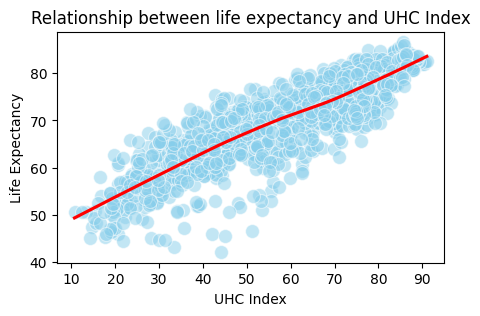

Correlation between Overweight percentage and Life expectancy: 0.6682


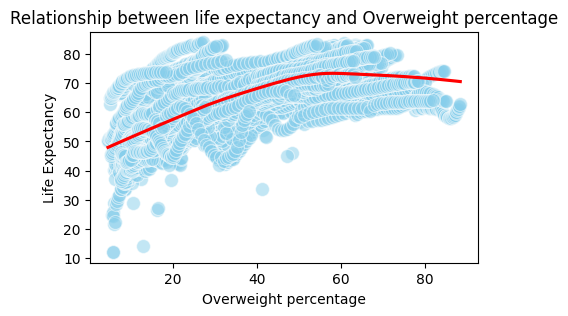

Correlation between HepatitusB Vaccination Rate and Life expectancy: 0.3361


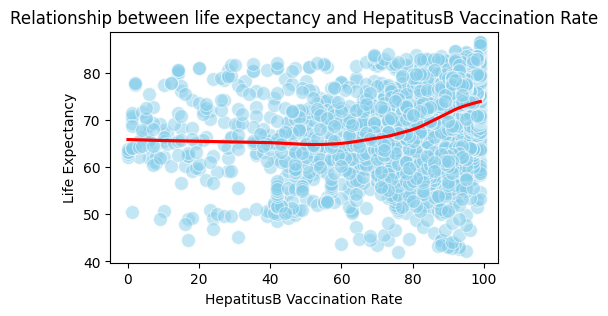

Correlation between Polio Vaccination Rate and Life expectancy: 0.6691


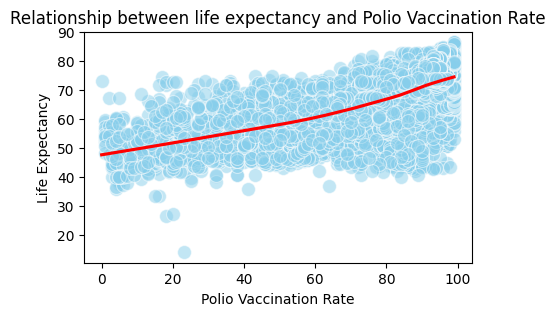

Correlation between Diptheria Vaccination Rate and Life expectancy: 0.6648


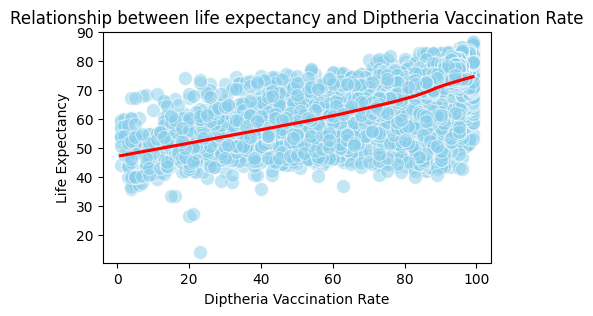

Correlation between Fruit Consumption Rate and Life expectancy: 0.3408


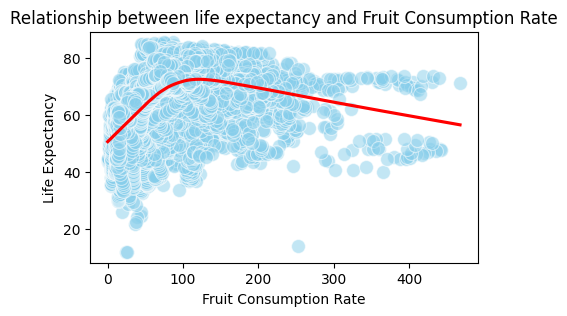

Correlation between Vegetable Consumption Rate and Life expectancy: 0.5229


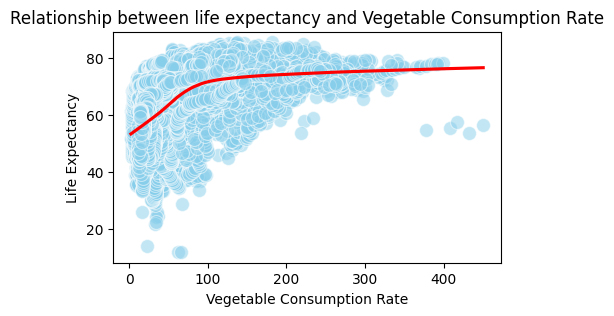

In [ ]:
rel_var = ['UHC Index', 'Overweight percentage', 'HepatitusB Vaccination Rate', 'Polio Vaccination Rate', 'Diptheria Vaccination Rate', 'Fruit Consumption Rate', 'Vegetable Consumption Rate']

for var in rel_var:
  viz_rel(var)

## Chapter 3: The Socioeconomic Impact on Life Expectancy
### Chart 6: Scatter plots showing the relationship between GDP per capita and life expectency



In [ ]:
mappings_df = pd.read_excel('/content/drive/MyDrive/SC4024/data/life expectancy data/country-continent.xlsx', sheet_name='Sheet1')
data_chp2 = pd.merge(life_expectancy_gdp_data, mappings_df, on='Entity', how='left')

In [ ]:
nan_rows = data_chp2[data_chp2['Continent_y'].isna()]
nan_rows_gdp = data_chp2[data_chp2['GDP per capita'].isna()]

drop_entities = nan_rows['Entity'].unique()
drop_entities_gdp = nan_rows_gdp['Entity'].unique()

data_chp2 = data_chp2[~data_chp2['Entity'].isin(drop_entities)]
data_chp2 = data_chp2[~data_chp2['Entity'].isin(drop_entities_gdp)]

data_chp2 = data_chp2.drop(['Continent_x', '900793-annotations', 'Code'], axis=1)

data_chp2

,Entity,Year,Period life expectancy at birth - Sex: all - Age: 0,GDP per capita,Population (historical),Continent_y,Status
1,Afghanistan,1950,27.7275,1156.0000,7776182.0,Asia,Least Developed
2,Afghanistan,1951,27.9634,1170.0000,7879343.0,Asia,Least Developed
3,Afghanistan,1952,28.4456,1189.0000,7987783.0,Asia,Least Developed
4,Afghanistan,1953,28.9304,1240.0000,8096703.0,Asia,Least Developed
5,Afghanistan,1954,29.2258,1245.0000,8207953.0,Asia,Least Developed
...,...,...,...,...,...,...,...
20235,Zimbabwe,2017,60.7095,1843.9463,14812484.0,Africa,Developing
20236,Zimbabwe,2018,61.4141,1900.1992,15034457.0,Africa,Developing
20237,Zimbabwe,2019,61.2925,1753.0244,15271377.0,Africa,Developing
20238,Zimbabwe,2020,61.1242,1585.9728,15526888.0,Africa,Developing


In [ ]:
data_chp2.isna().sum()

,0
Entity,0
Year,0
Period life expectancy at birth - Sex: all - Age: 0,0
GDP per capita,0
Population (historical),0
Continent_y,0
Status,0


In [ ]:
# Create an animated scatter plot
fig = px.scatter(
    data_chp2,
    x='GDP per capita',
    y='Period life expectancy at birth - Sex: all - Age: 0',
    animation_frame='Year',
    animation_group='Entity',
    size='Population (historical)',
    color='Continent_y',
    hover_name='Entity',
    log_x=True,  # Log scale for GDP per capita
    size_max=60,  # Control max size of bubbles
    range_x=[100, 100000],  # Adjust based on the data range for better visualization
    range_y=[30, 90],  # Adjust based on the life expectancy range
    title='Life Expectancy vs. GDP per Capita Over Time'
)

# Update layout for better visuals and interactivity
fig.update_layout(
    xaxis_title='GDP per capita',
    yaxis_title='Life Expectancy at birth (years)',
    template='plotly_white',
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': True},
                                'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons'
    }]
)

# Display the plot
fig.show()

In [ ]:
import plotly.express as px

# Create animated scatter plot with population legend
fig = px.scatter(
    data_chp2,
    x='GDP per capita',
    y='Period life expectancy at birth - Sex: all - Age: 0',
    animation_frame='Year',
    animation_group='Entity',
    size='Population (historical)',
    color='Continent_y',
    hover_name='Entity',
    log_x=True,
    size_max=60,
    range_x=[100, 100000],
    range_y=[30, 90],
    title='Life Expectancy vs. GDP per Capita Over Time',
)

# Update layout for better visuals and add population as part of the legend title
fig.update_layout(
    xaxis_title='GDP per capita',
    yaxis_title='Life Expectancy at birth (years)',
    template='plotly_white',
    legend_title=dict(text='Continent & Population Size'),
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': True},
                                'fromcurrent': True}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons'
    }]
)

# Add annotation to indicate that bubble size represents population
fig.add_annotation(
    xref="paper", yref="paper",
    x=1.05, y=1.05,
    text="Bubble size represents Population",
    showarrow=False,
    font=dict(size=12)
)

# Display the plot
fig.show()


In [ ]:
chp3_data = pd.merge(life_expectancy2_data, country_continent_data[['Entity', 'Status']], on='Entity', how='right')

In [ ]:
chp3_data = chp3_data[chp3_data['Year']==2021]

In [ ]:
chp3_data

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Status
71,Afghanistan,AFG,2021,61.9824,Least Developed
143,Albania,ALB,2021,76.4626,Developing
215,Algeria,DZA,2021,76.3767,Developing
287,American Samoa,ASM,2021,72.5398,Least Developed
359,Andorra,AND,2021,80.3684,Developed
...,...,...,...,...,...
16703,Wallis and Futuna,WLF,2021,78.4396,Developing
16775,Western Sahara,ESH,2021,70.7804,Developing
16847,Yemen,YEM,2021,63.7534,Least Developed
16919,Zambia,ZMB,2021,61.2234,Least Developed


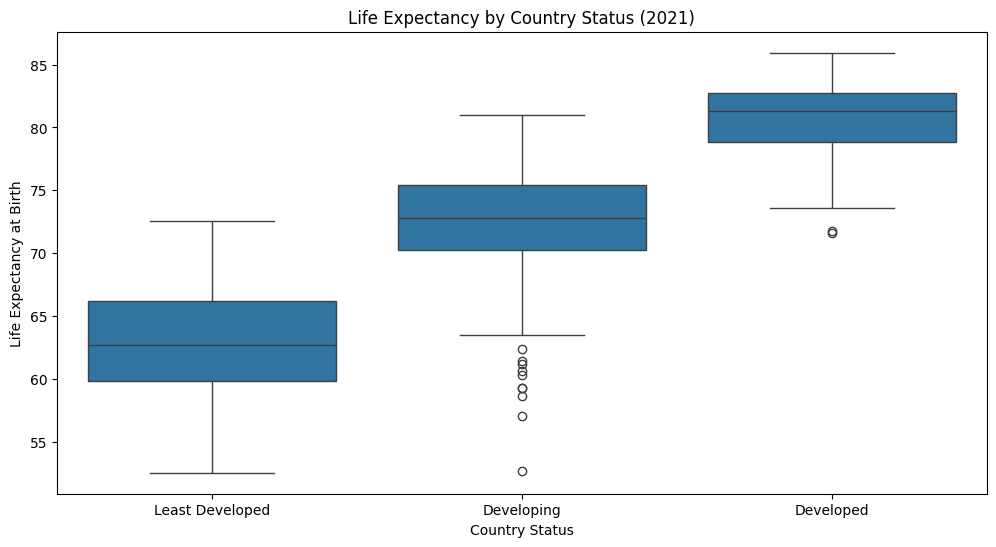

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=chp3_data, x='Status', y='Period life expectancy at birth - Sex: all - Age: 0')
plt.title('Life Expectancy by Country Status (2021)')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy at Birth')
# plt.xticks(rotation=45)
plt.show()